<a href="https://colab.research.google.com/github/edwinsalazar/AdvDataViz/blob/main/outcome/12%20Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/')
for item in os.listdir():
  print(item)
print("--------------")
os.chdir('/content/drive/MyDrive/cloud/GitHub/AdvDataViz/Notebooks/')
for item in os.listdir():
  print(item)
print("--------------")
notebooks = "/content/drive/MyDrive/cloud/GitHub/AdvDataViz/Notebooks"
print(os.listdir(notebooks))
print("--------------")

file = "heart-disease.csv"
file_path = os.path.join(notebooks, file)
with open(file_path, "r") as f:
  contents = f.read()

Mounted at /content/drive
learningStore
healthyCar
startup
cloud
Artificial Intelligence
--------------
03 Matplotlib  - Exercise.ipynb
02 Matplotlib.ipynb
01 Python_Pandas.ipynb
04 Continuous Variables - Histogram .ipynb
05 Continuous Variables - Histogram - Exercise .ipynb
07 Continuous Variables - Boxplot - Exercise .ipynb
03 Matplotlib - Exercise Solutions.ipynb
05 Continuous Variables - Histogram - Exercise Solutions.ipynb
06 Continuous Variables - Boxplot.ipynb
08 Continuous Variables - Scatterplot.ipynb
07 Continuous Variables - Boxplot - Exercise Solutions.ipynb
09 Continuous Variables - Scatterplot - Exercise Solutions.ipynb
09 Continuous Variables - Scatterplot - Exercise .ipynb
10 Categorical Variables - Bar_Pie.ipynb
12 Seaborn.ipynb
11 Pandas Data Visualization.ipynb
13 Seaborn - Exercise .ipynb
Top 50 US Tech Companies.csv
13 Seaborn - Exercise Solution.ipynb
15 Custom Modules.ipynb
14 Functions.ipynb
churn.csv
student_performance.csv
myplotlib.py
employee_attrition_.csv


In [3]:
sns.set_style("white")

In [4]:
#df = pd.read_csv("heart-disease.csv")
df = pd.read_csv(file_path)

df.head()

,age,sex,chest_pain,rest_bp,chol,max_hr,st_depr,heart_disease
0,63,female,3,145,233,150,2.3,1
1,37,female,2,130,250,187,3.5,1
2,41,male,1,130,204,172,1.4,1
3,56,female,1,120,236,178,0.8,1
4,57,male,0,120,354,163,0.6,1


---

# Line Plot

The line plot aggregates over multiple y values at each value of x and shows an estimate of the mean and a 95% confidence interval for that estimate.

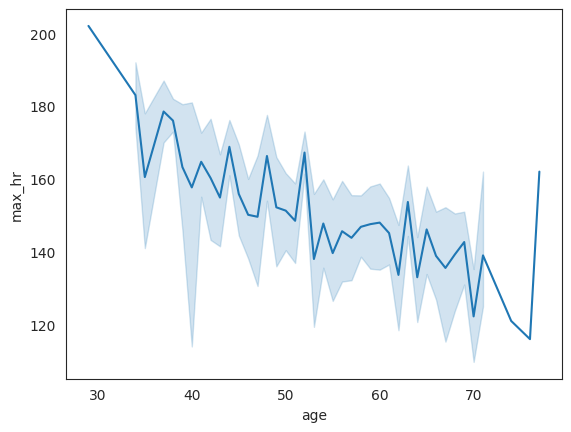

In [5]:
sns.lineplot(data=df, x="age", y="max_hr");

## Style by categorical feature
#### Using color as an aesthetic

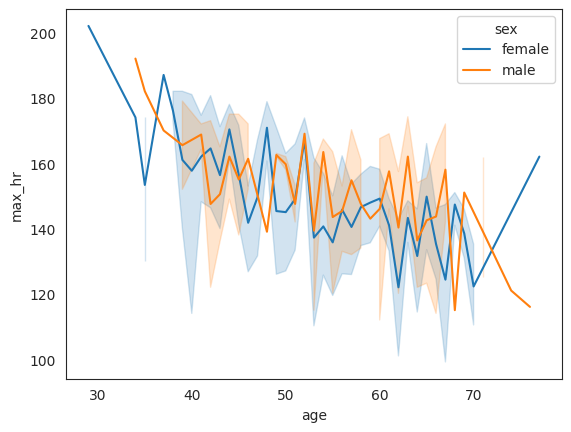

In [7]:
sns.lineplot(data=df, x="age", y="max_hr", hue="sex");

#### Using line style as an aesthetic

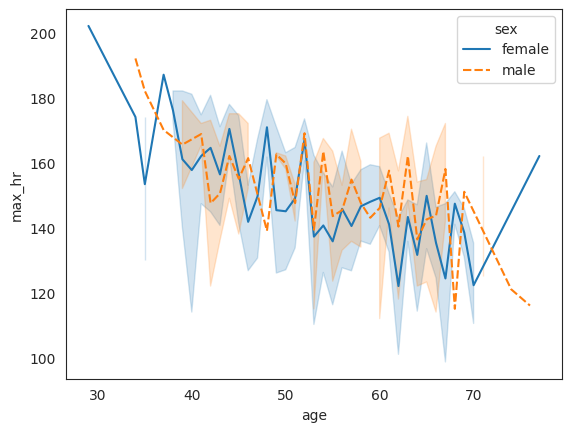

In [8]:
sns.lineplot(data=df, x="age", y="max_hr", hue="sex", style="sex");

# Relation Plot
### Map a categorical feature onto continuous features

## Line plot

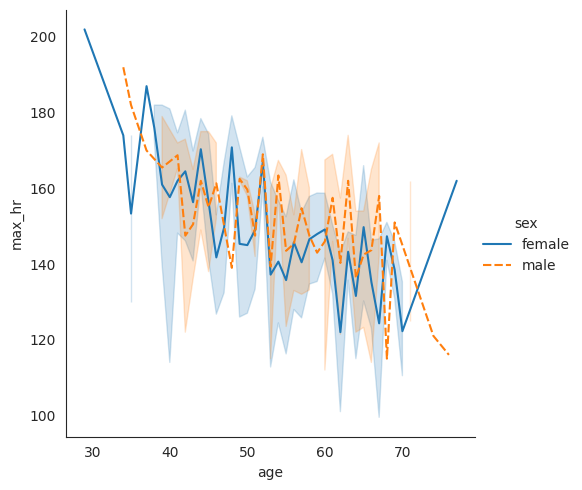

In [9]:
sns.relplot(data=df, x="age", y="max_hr", kind="line",
                     hue="sex", style="sex");

### Use an additional categorical feature to display columns

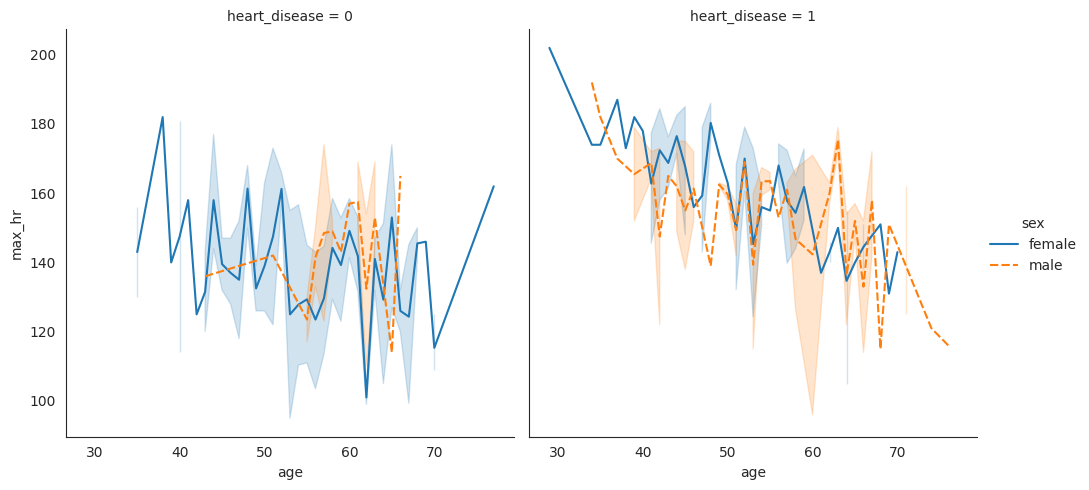

In [10]:
sns.relplot(data=df, x="age", y="max_hr", kind="line",
                     hue="sex", style="sex",
                     col="heart_disease"); # display columns based on having heart disease or not

## Scatter plot

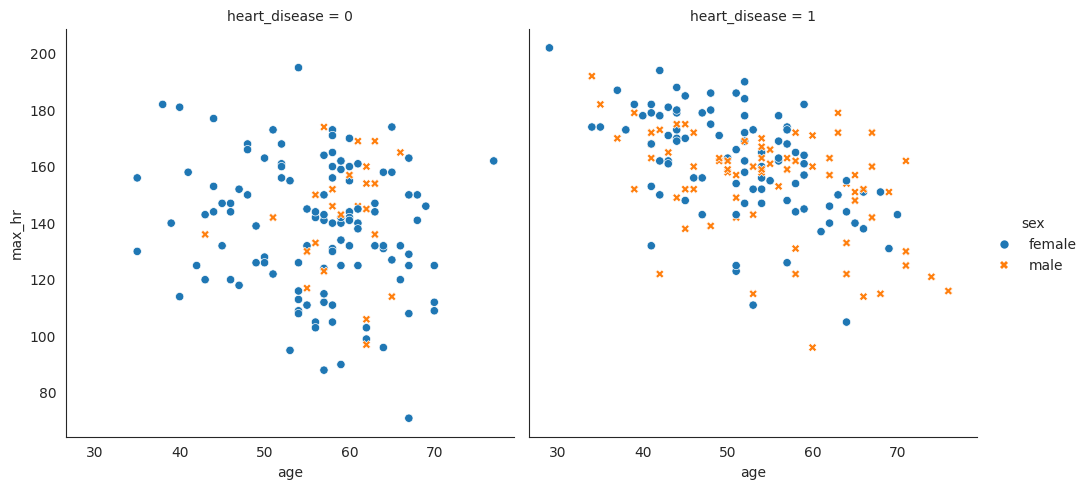

In [11]:
sns.relplot(data=df, x="age", y="max_hr", kind="scatter",
                     hue="sex", style="sex",
                     col="heart_disease"); # display columns based on having heart disease or not

### Set size of marker by categorical feature
#### Using color and size as aesthetics

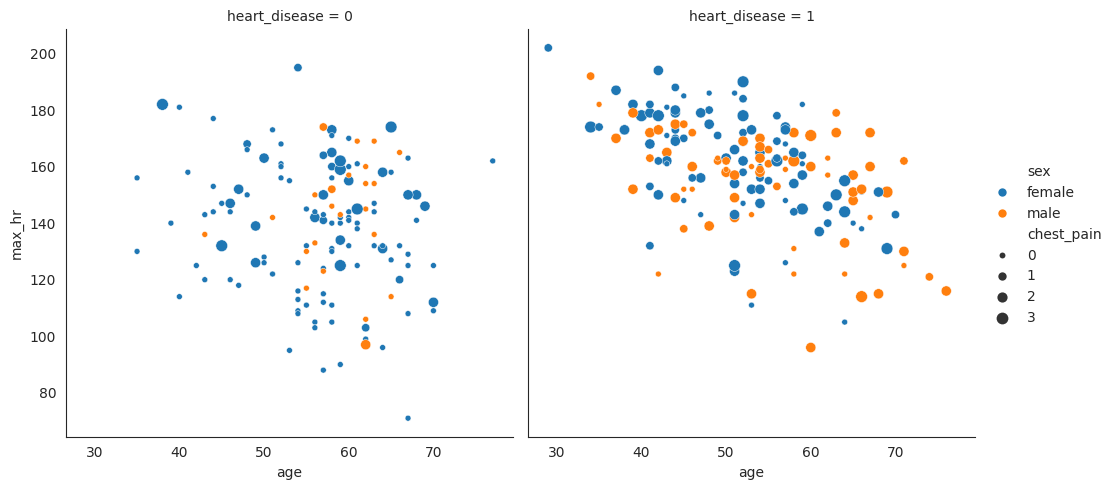

In [12]:
sns.relplot(data=df, x="age", y="max_hr", kind="scatter",
                     hue="sex", size="chest_pain", # marker size is based on the type of chest pain
                     col="heart_disease");

---

# Density Plot

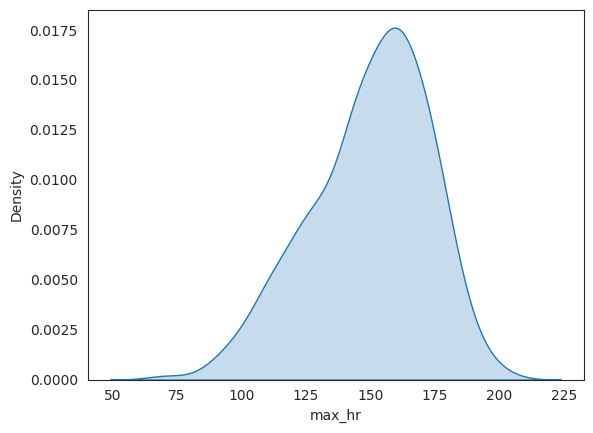

In [13]:
fig, ax = plt.subplots()

sns.kdeplot(data=df, x="max_hr", fill=True);

### Max HR of Females by Heart Disease
#### Using color as an aesthetic

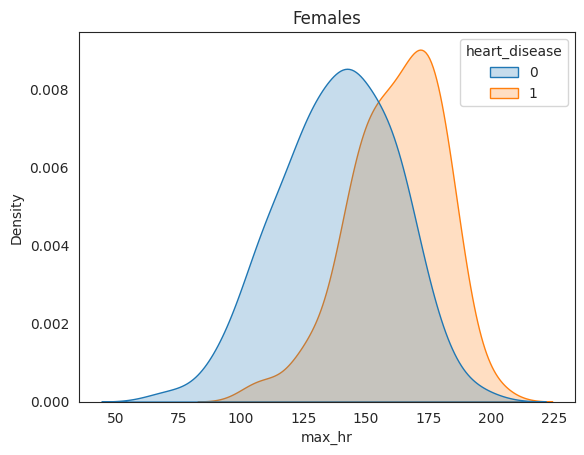

In [14]:
fig, ax = plt.subplots()
ax.set(title="Females")

sns.kdeplot(data=df, x=df.loc[df["sex"] == "female", "max_hr"],
                 hue = "heart_disease", fill=True);

### Max HR of Males by Heart Disease
#### Using color as an aesthetic

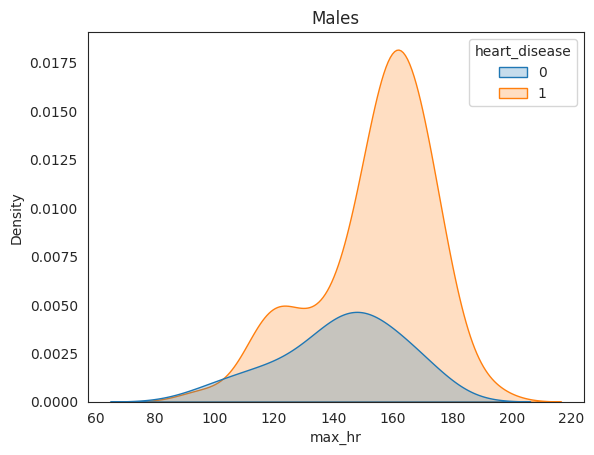

In [15]:
fig, ax = plt.subplots()
ax.set(title="Males")

sns.kdeplot(data=df, x=df.loc[df["sex"] == "male", "max_hr"],
                 hue = "heart_disease", fill=True);

### Combine the plots and scale

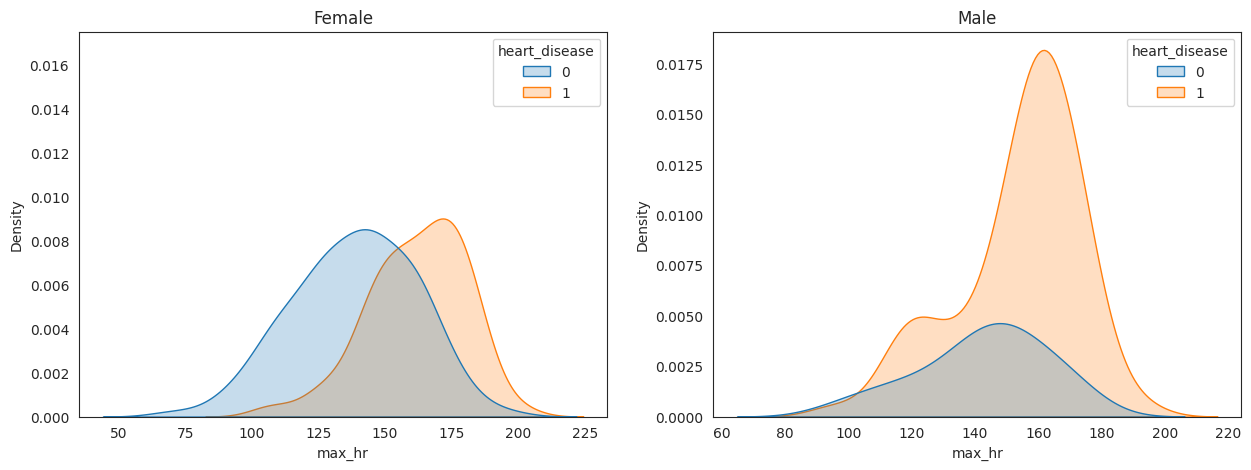

In [21]:
# Using matplotlib to create axes
fig, (left, right) = plt.subplots(1,2, figsize=(15, 5))

sns.kdeplot(data=df, x=df.loc[df["sex"] == "female", "max_hr"],
                 hue = "heart_disease", fill=True, ax=left);

sns.kdeplot(data=df, x=df.loc[df["sex"] == "male", "max_hr"],
                 hue = "heart_disease", fill=True, ax=right)

left.set(title="Female")
right.set(title="Male");

# Scale the plots
left.set_ylim((0, .0175));

---

# Distribution Plot

### Histogram

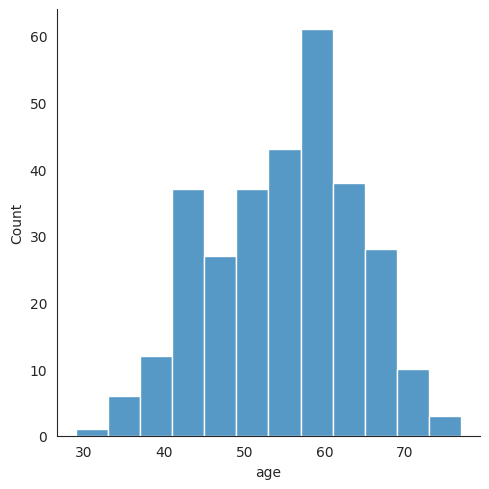

In [22]:
sns.displot(data=df, x="age", kind="hist");

### Customize the number of bins

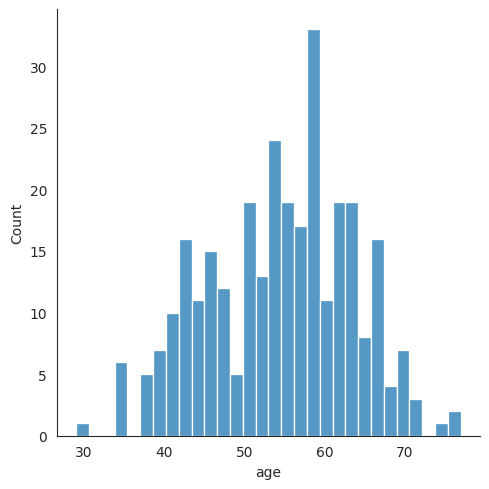

In [23]:
sns.displot(data=df, x="age", kind="hist", bins=30);

## Density plot
Smooth histogram

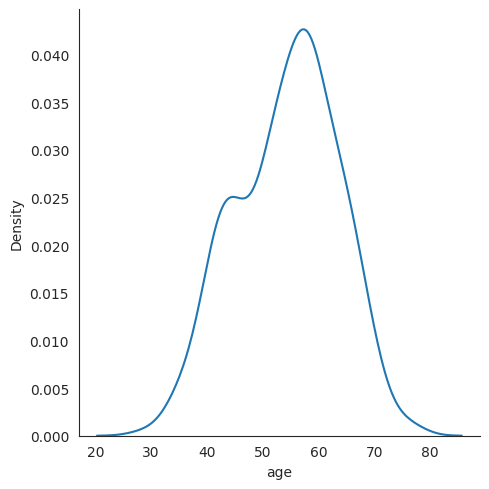

In [24]:
sns.displot(data=df, x="age", kind="kde");

### histogram and density plot combined

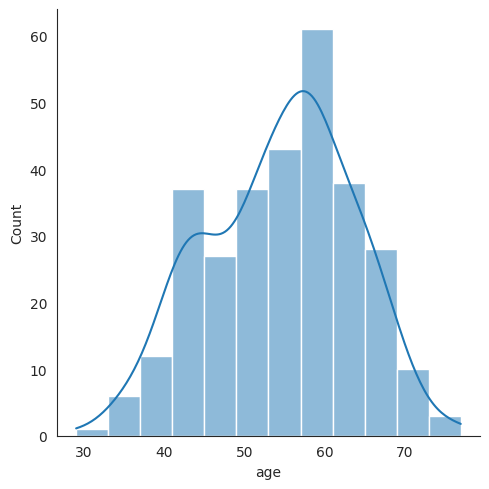

In [26]:
sns.displot(data=df, x="age", kind="hist", kde=True);

## Joint: continuous x categorical

### Set color by categorical feature
#### Age x Sex

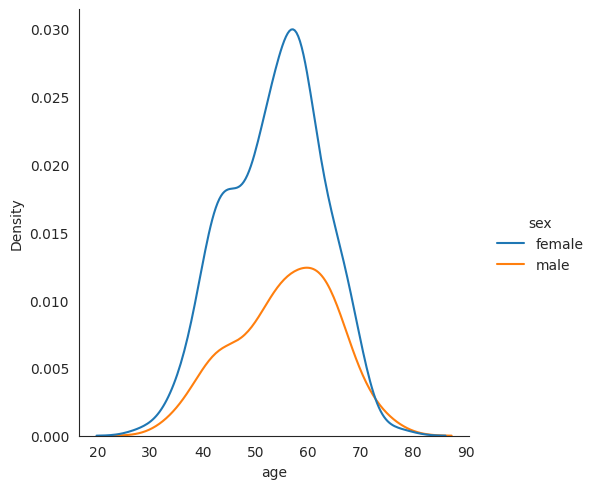

In [27]:
sns.displot(data=df, x="age", kind="kde", hue="sex");

### Fill

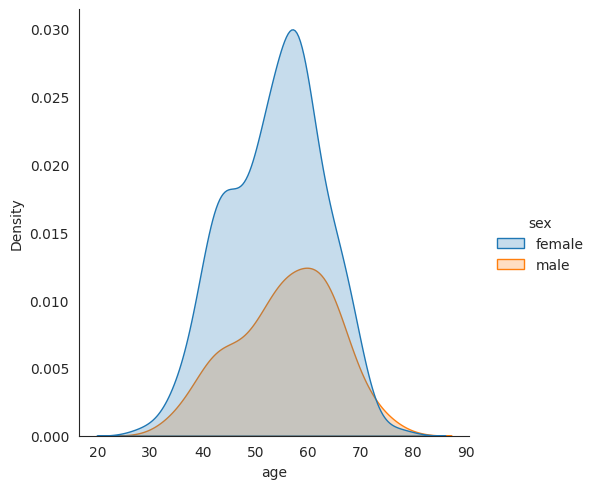

In [28]:
sns.displot(data=df, x="age", kind="kde", hue="sex", fill=True);

### Multiple categories
#### Age x Chest Pain type

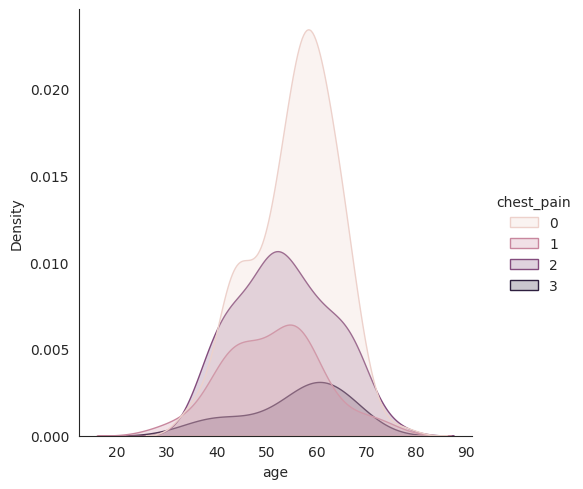

In [29]:
sns.displot(data=df, x="age", kind="kde", hue="chest_pain", fill=True);

---

# Box Plot

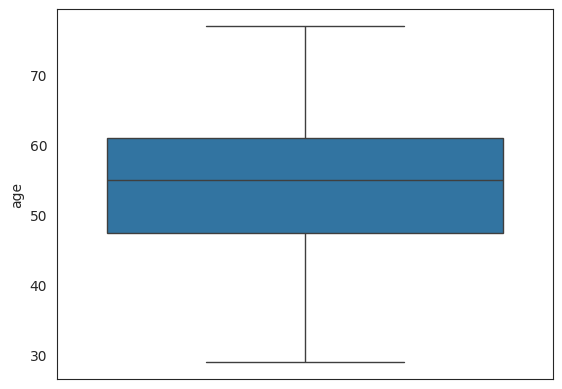

In [30]:
sns.boxplot(data=df, y="age");

### Autoset color by categorical feature

#### Chest pain type

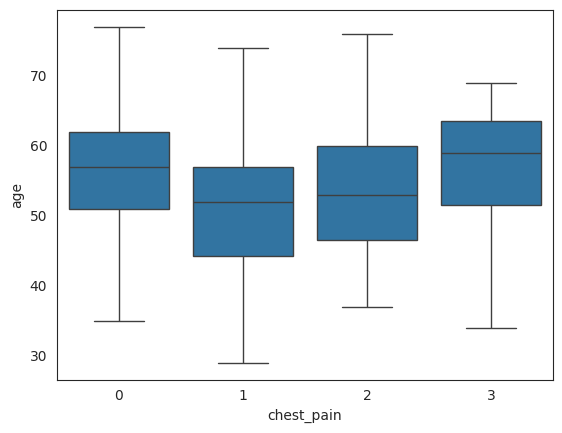

In [31]:
sns.boxplot(data=df, x="chest_pain", y="age");

### Choose a color palette (colormap)
[Colormaps](https://matplotlib.org/stable/gallery/color/colormap_reference.html)

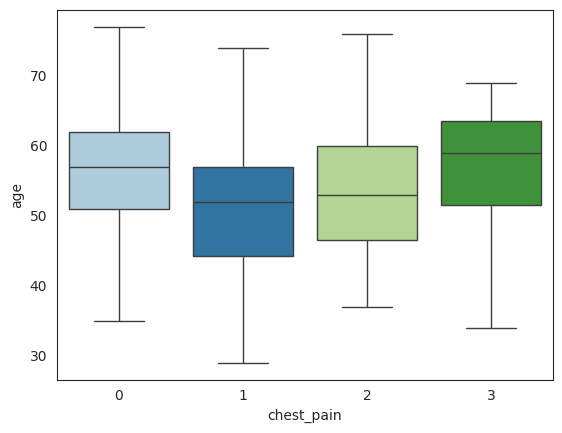

In [32]:
sns.boxplot(data=df, x="chest_pain", hue="chest_pain", y="age", palette="Paired", legend=False);

---

# Setting the theme

### Seaborn defaults

grid style: darkgrid, context: notebook, palette: tab10

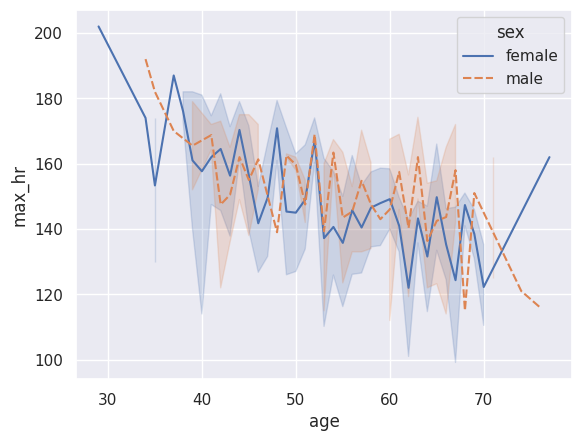

In [33]:
sns.set_theme()

sns.lineplot(data=df, x="age", y="max_hr",
                      hue="sex", style="sex");

## Set grid style
There are five preset styles: darkgrid (default), whitegrid, dark, white, ticks

In [34]:
sns.set_style("whitegrid")

## Setting plot context
There are four preset contexts in order of relative size: paper, notebook (default), talk, poster.

In [35]:
sns.set_context("poster")

## Set colors by selecting a desired palette (colormap)
[Colormaps](https://matplotlib.org/stable/gallery/color/colormap_reference.html)

Sample colormaps: Set1, Dark2, Accent, Pastel1, Reds, Greens, Blues

In [36]:
sns.set_palette("Set1")

## Render plot with the above settings

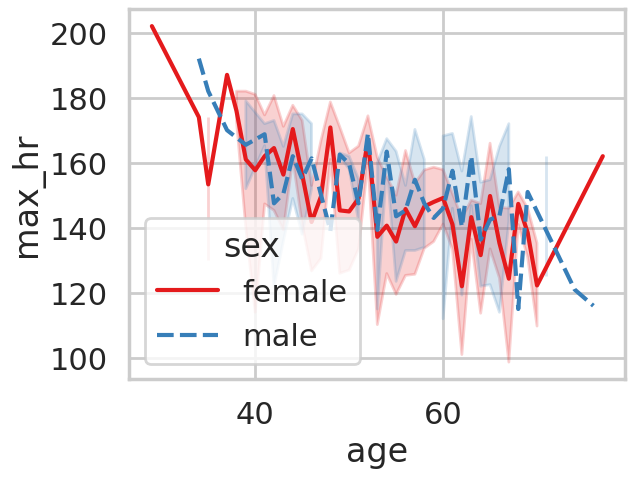

In [38]:
sns.lineplot(data=df, x="age", y="max_hr",
                      hue="sex", style="sex");

## Setting the theme enables customizing the style, context and colors together

In [39]:
sns.set_theme(style='ticks', context='notebook', palette='Set1')

In [ ]:
sns.lineplot(data=df, x="age", y="max_hr",
                      hue="sex", style="sex");

---

# Linear Regression Plot

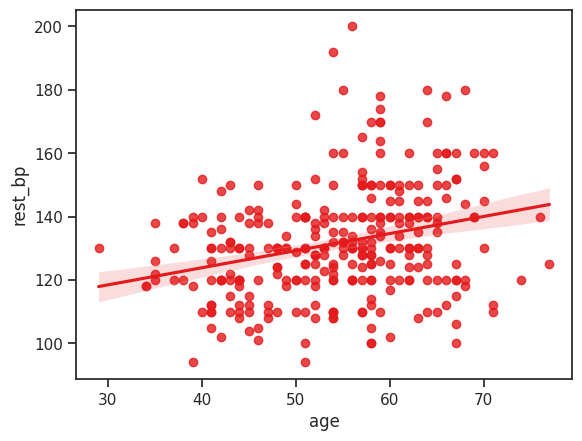

In [40]:
sns.regplot(data=df, x="age", y="rest_bp");

### Add additional dimension to visualization. Adjust the figure size.
#### Using color as an aesthetic

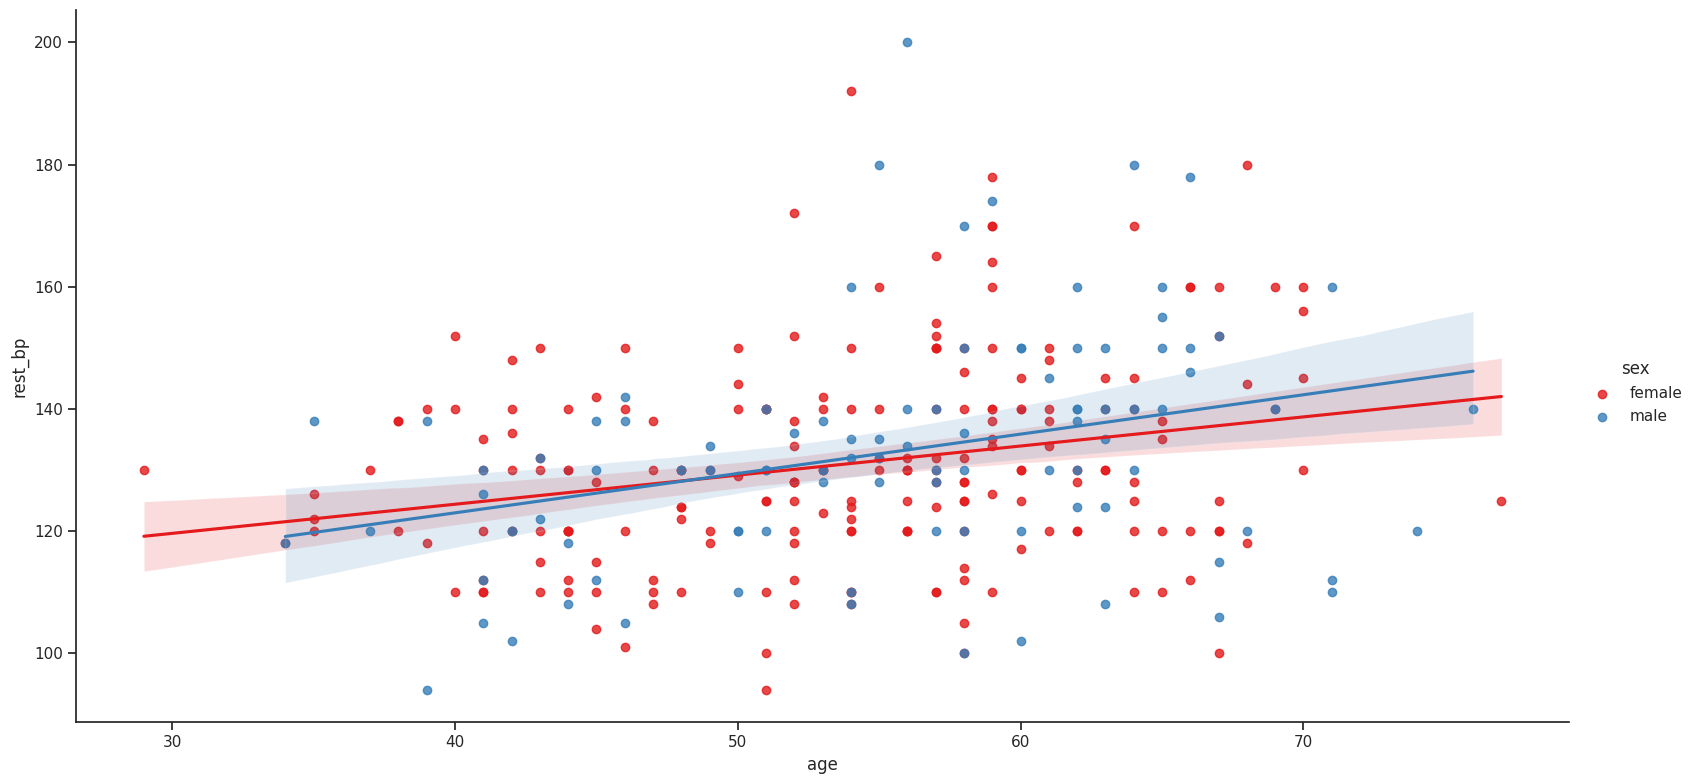

In [41]:
sns.lmplot(data=df, x="age", y="rest_bp",
           hue="sex", height=8, aspect=2, palette="Set1");
                        # The aspect here sets the width to be 2 times the height.

---

---

# Joint Plot
Defaults to a scatterplot of x and y with histograms.

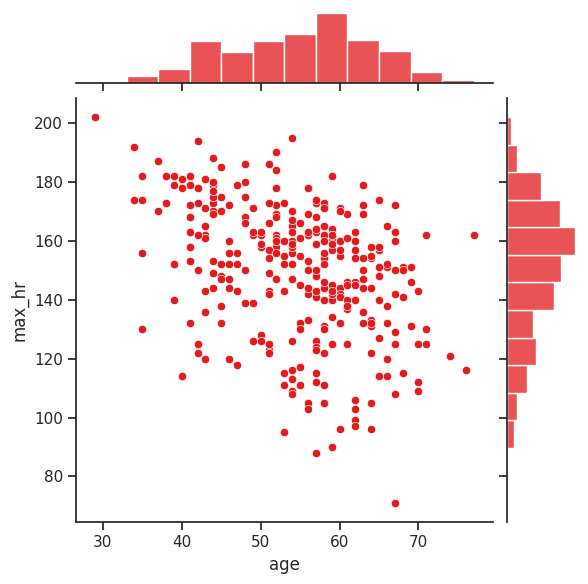

In [42]:
sns.jointplot(data=df, x="age", y="max_hr");

### Set the kind to regression.
Adds a regression line and histograms with density plots.

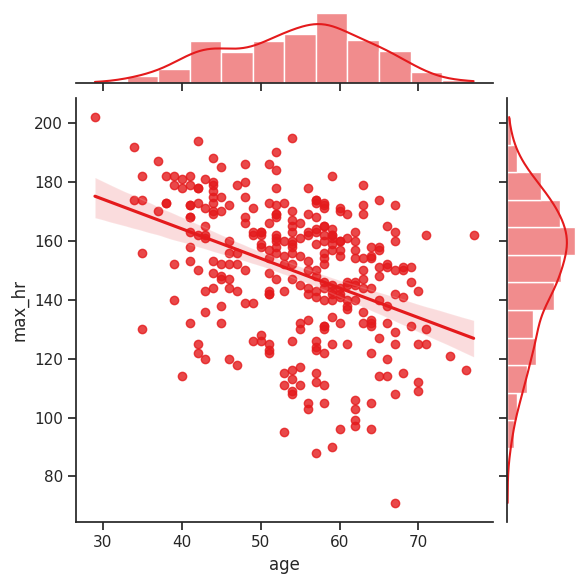

In [43]:
sns.jointplot(data=df, x="age", y="max_hr", kind="reg");

### Set the hue to a categorical feature
Provides desity plots.

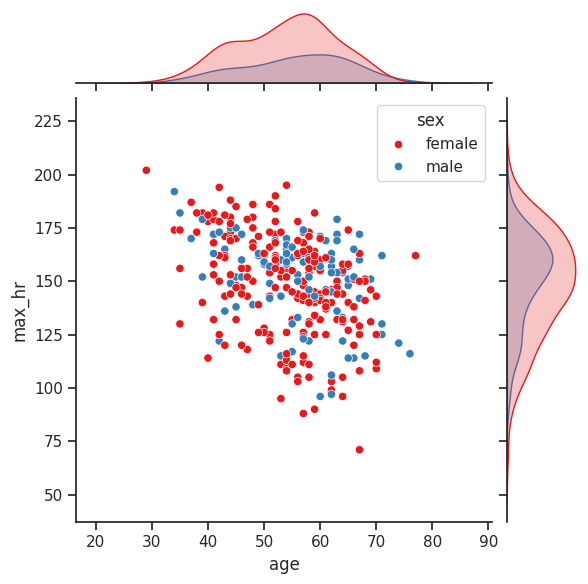

In [44]:
sns.jointplot(data=df, x="age", y="max_hr", hue="sex");

---

# Pair Plot

### Pairwise feature comparisons

In [45]:
df.head()

,age,sex,chest_pain,rest_bp,chol,max_hr,st_depr,heart_disease
0,63,female,3,145,233,150,2.3,1
1,37,female,2,130,250,187,3.5,1
2,41,male,1,130,204,172,1.4,1
3,56,female,1,120,236,178,0.8,1
4,57,male,0,120,354,163,0.6,1


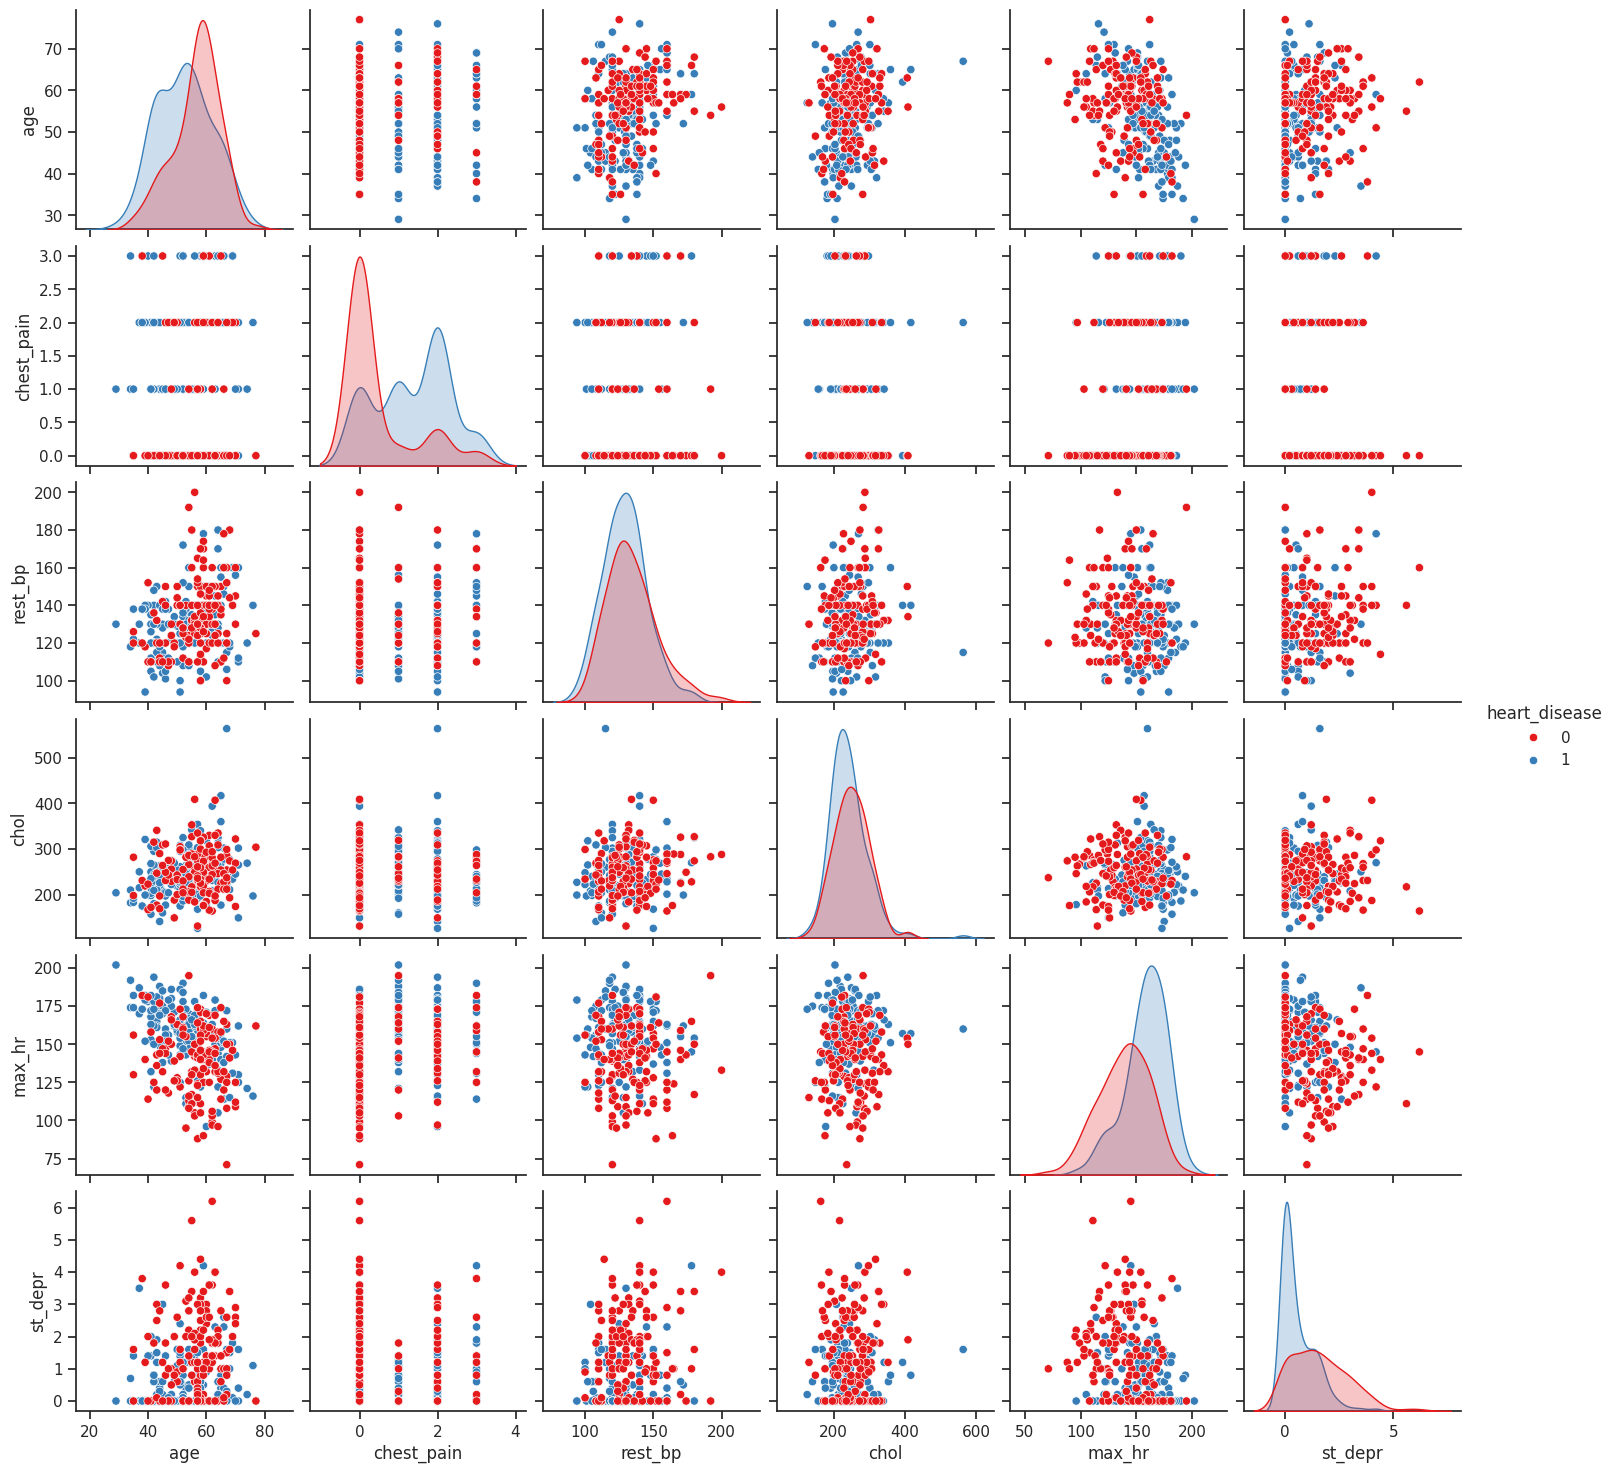

In [46]:
sns.pairplot(data=df, hue="heart_disease");

---

# Heat Map
### Visualize correlations

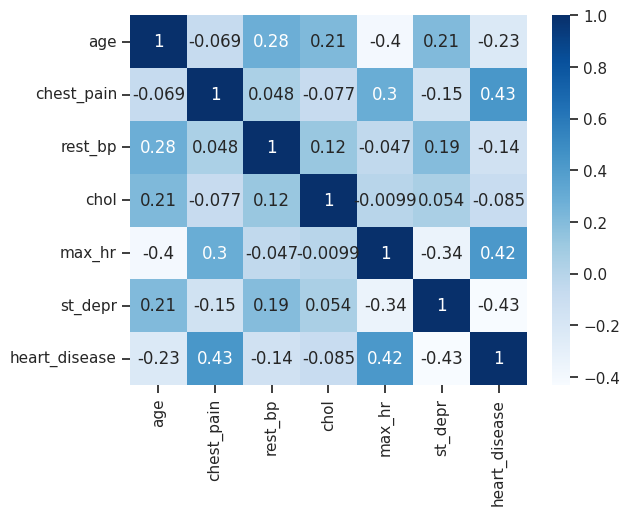

In [47]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cbar=True, cmap="Blues");

---